Neste módulo vamos olhar um pouco mais para o treinamento dos modelos de regresão e classifcação e modelos de regressão polinomial, bem como regulação.

Para problemas de regressão linear, existe uma forma fechada para calcularmos nossos parâmtros $\theta$ e é conhecida como Equação Normal: <br>
    $\hat{\theta} = (X^T.X)^{-1}.X^T.y$, onde $\hat{\theta}$ é o valor de $\theta$ que minimiza nossa função de custo e y é o vetor contendo os valores alvo de treinamento

Vamos verificar esses resultados por um simples teste:

In [184]:
import numpy as np

Vamos encontrar a reta que melhor se ajusta à função $y = 3x_0 + 4 + ruído$

In [185]:
np.random.seed(42)

X = 2*np.random.randn(100, 1)
y = 4+3*X+np.random.randn(100 ,1)

Lembre-se que além dos valores de $\theta$ para X, temos que encontrat nosso valor do bias, sendo assim adicionaremos 1 em cada instância, para obternos bias*1 = bias

In [186]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [187]:
theta_best

array([[ 4.00742783],
       [ 2.92837142]])

Perfeito! Esperávamos obter [4, 3] ao invés de [4,00 e 2,92], porém o ruído adicionado à função não nos permite recuperar os valores exatos.

Vamos prever uma nova instância

In [188]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [189]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.00742783],
       [ 9.86417067]])

Vamos visualizar graficamente

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

[0, 2, 0, 15]

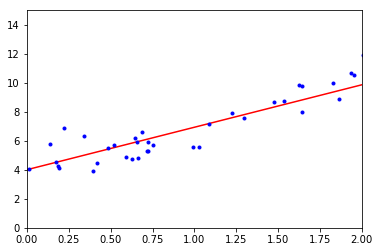

In [191]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

Uma outra forma de encontrarmos os coeficientes para nossa regressão é utilizando o Gradiente Descendente. Este é viável quando o número de features é grande, uma vez que calcular a matriz inversa $X^{-1}$ tem complexidade aproximada de $n^3$ em relação ao número de colunas em $X$.

Seja o vetor gradiente da função de custo MSE = $\frac{2}{m}X^T.(X.\theta-y)$

A atualização de nossos parâmetros é dada por: $\theta^{novo} = \theta - \eta \nabla_{\theta}MSE(\theta)$, onde $\eta$ é nossa taxa de aprendizado, ou seja, o tamanho do passo dado em cada atualização dos parâmetros.

In [192]:
eta = 0.1 #taxa de aprendizado
n_iterations = 1000
m = 100

In [193]:
theta = np.random.randn(2,1)

In [194]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [195]:
theta

array([[ 4.00742783],
       [ 2.92837142]])

<h3>Regressão Polinomial</h3>

Suponha os seguintes dados

In [196]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

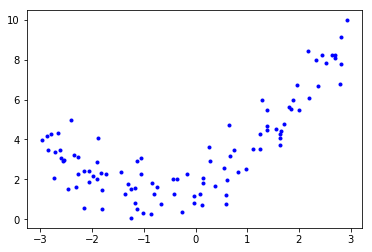

In [197]:
plt.plot(X, y, "b.")

Claramente, uma linha reta nunca se ajustará a esses dados. Porém podemos utilizar uma tática, criar features polinomiais (e.g. $x^2$). Com isso podemos continuar usando modelos lineares, uma vez que este modelo ainda será linear em relação aos meus dados (os parâmetros continuam lineares)

In [198]:
from sklearn.preprocessing import PolynomialFeatures

In [199]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [200]:
X[0]

array([-0.75275929])

In [201]:
X_poly[0]

array([-0.75275929,  0.56664654])

Nosso vetor de X_poly possui a feature original ($x$) e o quadrado dela ($x^2$). Agora podemos usar um modelo linear.

In [202]:
from sklearn.linear_model import LinearRegression

In [203]:
lin_reg = LinearRegression()

In [204]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [205]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

[ 1.78134581]
[[ 0.93366893  0.56456263]]


Graficamente

In [206]:
curve = lin_reg.predict(X_poly)

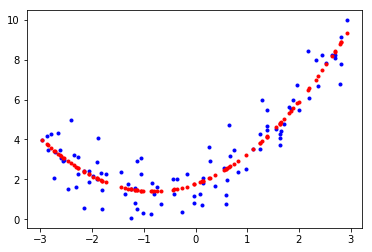

In [207]:
plt.plot(X, y, "b.")
plt.plot(X, curve, "r.")

Quanto maior o grau do polinômio que utilizarmos, mais a reta se ajustará aos nossos dados, o que pode ser perigoso em pois podemos sofrer com overfitting. Além dos métodos de cross validation, podemos plotar a curva de aprendizado do modelo, onde treinamos vários modelos com número de exemplos distintos e vemos com oele se comporta nos copnjuntos de treinamento e de validação.

In [208]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [209]:
def plot_learning_curves(model, X, y):
    np.random.seed(0)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.ylim(0, 3.5)
    plt.legend(loc='upper right')    

In [210]:
lin_reg = LinearRegression()

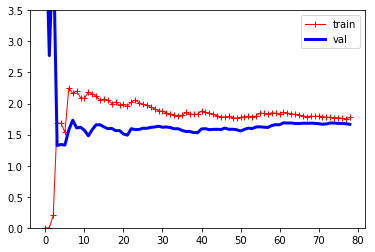

In [211]:
plot_learning_curves(lin_reg, X, y)

Vamos analisar este gráfico. Observe que quando quando temos apenas duas instâncias de treinamento o modelo consegue se ajustar perfeitamente a elas (2 pontos = uma reta), porém à medida que vamos adidiocnando mais exemplos, a taxa de erro começa a subir. Mesmo conseguindo se ajustar aos pouco o aprendizado se estabiliza, uma vez que o modelo lnear sem features polinomiais não consegue se ajusta a esta curva. Um comportamento parecido pode ser observado no conjunto de validação. O erro se iniica alto, uma vez que com apenas duas inatâncias não conseguimos generalizar o problema (overfitting), decresce um pouco, porém ainda assim não consegue ser generalizado pelo modelo, se estabilizando em um valor alto.

Agora vamos ver como seria esse comportamento com um polinomial de grau 15

In [212]:
from sklearn.pipeline import Pipeline

In [222]:
polinomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
    ("sgd_reg", LinearRegression()),
])

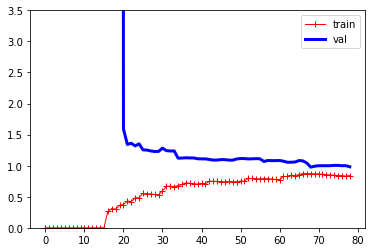

In [223]:
plot_learning_curves(polinomial_regression, X, y)

Observe que neste caso nosso erro durante o trainamento é bem baixo, porém existe uma margem entre o do conjunto de validação e erro, o que indica um possível overfitting devido ao alto grau do polinomio que estamos usando

Uma forma de lidarmos com overfiting é adicionarmos mais dados ao treinamento ou por meio de regularzação